In [53]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = (12,6)

font = {'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

First we set up the parameters of the model. Below we set the size of the Hilbert space to include 30 atomic levels. Then we define the atom annihilation operator b. Next we define:

$\chi=220$MHz

$\kappa=311$MHz

$\epsilon_1=89$MHz

$\epsilon_2=1.244$GHz

$\epsilon_{\textsf{eff}}=-\epsilon_1 - i \epsilon_2$

$\delta=-1.825$GHz

In [96]:
n_levels = 30
b = destroy(n_levels)
chi = 0.22
kappa = 0.311
epsilon_1 = 0.089
epsilon_2 = 1.244
epsilon_eff = - epsilon_1 - 1j*epsilon_2
delta = -1.825

Then we define the Hamiltonian:

$H = H_{\textsf{atom}} + H_{\textsf{pump}}$

where

$H_{\textsf{atom}} = \delta b^\dagger b + \chi b^\dagger b^\dagger b \, b$

$ H_{\textsf{pump}} = \epsilon_{\textsf{eff}} b^\dagger + \epsilon_{\textsf{eff}}^* b$

In [97]:
hamiltonian_atom = delta*b.dag()*b + chi*b.dag()*b.dag()*b*b
hamiltonian_pump = epsilon_eff*b.dag() + np.conjugate(epsilon_eff)*b
hamiltonian = hamiltonian_atom + hamiltonian_pump

Now we define a list of Lindblad operators. In thise case we have just one:

$L = \sqrt{2 \kappa} b$

In [98]:
collapse_operators = [np.sqrt(2*kappa)*b]

Then we use the steadystate function in qutip to find the steady state density matrix of the Linblad master equation:

$ \frac{d \rho}{dt} = - i [H,\rho] + D(L) \rho$

where

$D(L)\rho = L\rho L^\dagger - \frac{1}{2}(L^\dagger L \rho + \rho L^\dagger L)$

In [99]:
rho_steady_state = steadystate(hamiltonian,collapse_operators)

In [100]:
b_expectation = expect(b, rho_steady_state)
print('<b> = '+str(b_expectation))
print('|<b>|^2 = '+str(np.abs(b_expectation)**2))

<b> = (-0.922018513927+0.857716737098j)
|<b>|^2 = 1.58579614112


From this steady state I produce a plot of the Q function. 

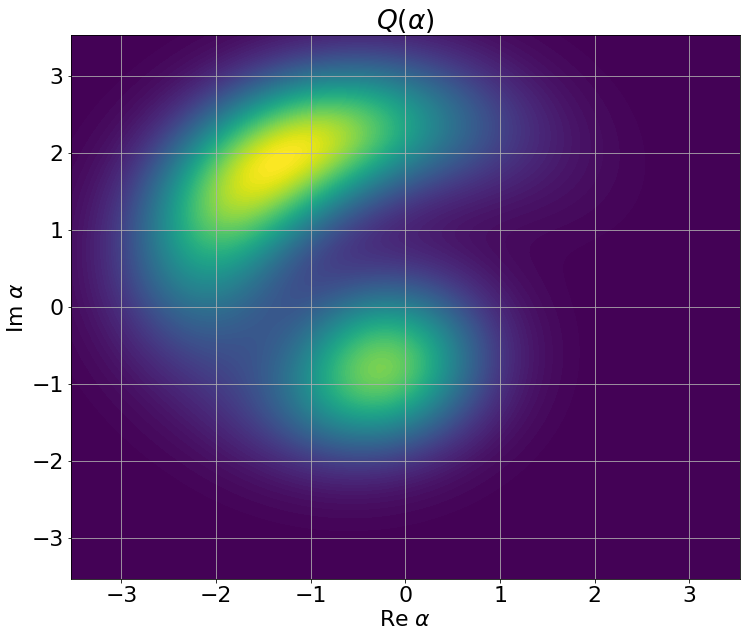

In [101]:
x_array = np.linspace(-5,5,101)
y_array = np.linspace(-5,5,101)

q_function = qfunc(rho_steady_state, x_array, y_array)

fig, axes = plt.subplots(figsize=(12,10))
cont0 = axes.contourf(x_array/np.sqrt(2), y_array/np.sqrt(2), q_function, 100)
axes.set_xlabel(r'Re $\alpha$')
axes.set_ylabel(r'Im $\alpha$')
axes.set_title(r'$Q(\alpha)$')
axes.grid()

Next I plot a bar chart of the diagonal elements of the density matrix. This shows the occupation probabilities of the different cavity levels.

Text(0,0.5,'Occupation')

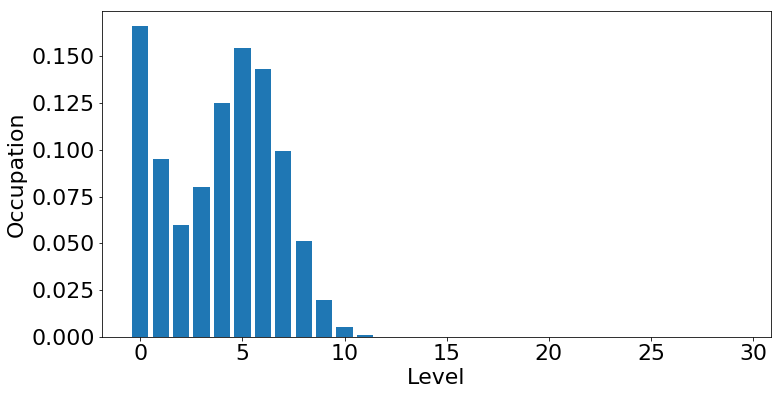

In [102]:
occupations = rho_steady_state.diag()

fig, axes = plt.subplots(1,1)

axes.bar(range(n_levels),occupations)
axes.set_xlabel('Level')
axes.set_ylabel('Occupation')

Now I crosscheck the method of plotting the Q function. I generate a coherent state with alpha=4 and plot the Q function. We expect to see a peak at alpha=4. This is what we observe.

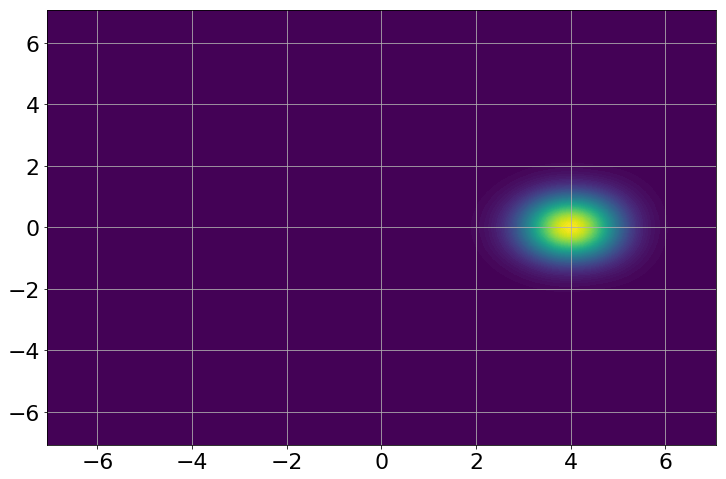

In [103]:
alpha = 4
state = coherent_dm(n_levels, alpha, offset=0, method='operator')

x_array = np.linspace(-10,10,101)
y_array = np.linspace(-10,10,101)

q_function = qfunc(state, x_array, y_array)

fig, axes = plt.subplots(figsize=(12,8))
cont0 = axes.contourf(x_array/np.sqrt(2), y_array/np.sqrt(2), q_function, 100)
axes.grid()